In [1]:
import torch 
import matplotlib.pyplot as plt

In [11]:
#simulating data
from targets.conditional_density_estimation_target import DoubleWave, Wave
simulator = DoubleWave()

N_simulations = 10000
D_theta = simulator.sample_prior(N_simulations)
D_x = simulator.simulate(D_theta)

data_generating_process = Wave()
mu_theta = torch.zeros(1)
sigma_theta = torch.eye(1)
theta_prior_distribution = torch.distributions.MultivariateNormal(mu_theta, sigma_theta)
theta0 = theta_prior_distribution.sample()

N_observations = 100
x0 = data_generating_process.simulate(theta0.unsqueeze(0).repeat(N_observations,1))

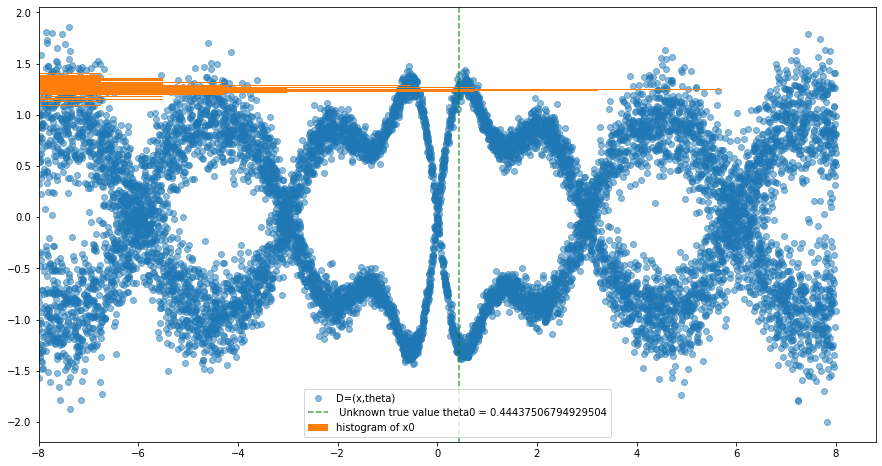

In [12]:
plt.figure(figsize = (15,8))
plt.set_xlim = (-8,8)
plt.scatter(D_theta[:,0].numpy(), D_x.numpy(), alpha =.5, label = 'D=(x,theta)') 
plt.axvline(theta0.numpy(), color = 'green', alpha = .7, linestyle = '--', label=' Unknown true value theta0 = ' + str(theta0.item()))
hist = plt.hist(x0.numpy(), orientation ='horizontal', bins = 40, density = True, bottom = -8, label = 'histogram of x0', color = 'C1')
plt.legend()

In [13]:
from conditional_density_estimators import ConditionalDIFDensityEstimator

In [14]:
#Without taking into account x0
dif = ConditionalDIFDensityEstimator(D_x,D_theta,20,[32,32,32])
dif.train(500,1000)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:01<00:00,  4.13it/s, loss = 0.029649 ; device: cuda]


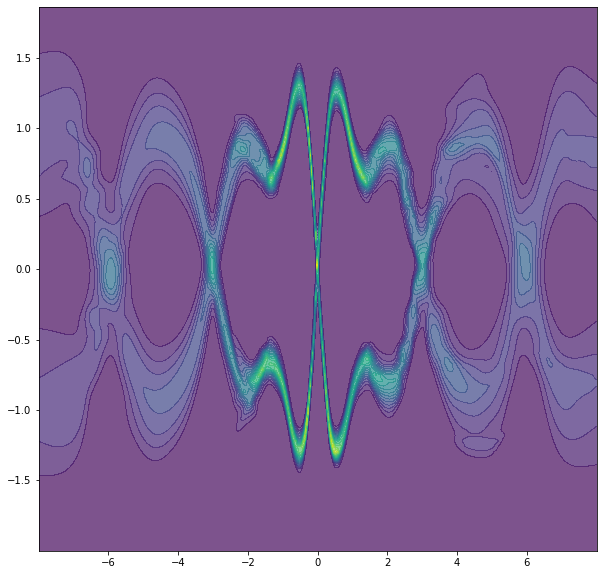

In [15]:
from utils import plot_2d_function, plot_likelihood_function
plot_likelihood_function(dif.log_density, x_min = torch.min(D_theta), x_max = torch.max(D_theta), y_min= torch.min(D_x), y_max = torch.max(D_x),delta_x = 500, levels = 20)
plt.show()

In [16]:
from samplers import IMH
target_log_prob = lambda theta: torch.sum(dif.log_density(x0.unsqueeze(0).repeat(theta.shape[0],1,1),theta.unsqueeze(1).repeat(1,x0.shape[0],1)), dim=1) + theta_prior_distribution.log_prob(theta)
sampler = IMH(target_log_prob,1, theta_prior_distribution, 100)
samples = sampler.sample(100)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:17<00:00,  5.77it/s, acceptance = tensor(0.0300)]


(array([44., 38.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  5.]),
 array([-0.6683325 , -0.6423782 , -0.61642396, -0.59046966, -0.56451535,
        -0.5385611 , -0.5126068 , -0.48665252, -0.46069825, -0.43474394,
        -0.40878966, -0.3828354 , -0.3568811 , -0.3309268 , -0.30497253,
        -0.27901825, -0.25306398, -0.22710967, -0.2011554 , -0.1752011 ,
        -0.14924683, -0.12329254, -0.09733825, -0.07138397, -0.04542968,
        -0.0194754 ,  0.00647888,  0.03243317,  0.05838745,  0.08434173,
         0.11029603,  0.1362503 ,  0.1622046 ,  0.18815887,  0.21411316,
         0.24006745,  0.26602173,  0.291976  ,  0.3179303 ,  0.3438846 ,
         0.36983886,  0.39579314,  0.42174745,  0.44770172,  0.473656  ,
         0.4996103 ,  0.52556455,  0.55151886,  0.57747316,

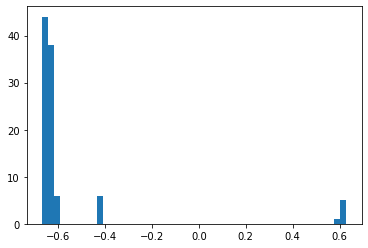

In [17]:
plt.hist(samples.numpy(), bins = 50)